In [1]:
import tweepy
import pandas as pd
import html
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import preprocessor as p
plt.style.use('fivethirtyeight')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from gensim.models import LsiModel
import spacy 
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

# Capturing Live Streaming Data 

In [2]:
#Twiiter API Credentials
consumer_key='tj8u1goNEoT7mHkK385PU2KJP'
consumer_secret='Fh5pYyrlXpvm0j5u4aA0THGanIntmaxeFFKBqUULZR0XHJqG7V'
access_token='1568621246660890631-1b7CjaPEKdJCuXKvoEwZgREgWae7os'
access_token_secret='IPz8esFapzU3AW8vNVBVIQEGFWiqXSXms1IRjBcLsJo4I'

#Create the authentication object
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)

# Set the access token and access secret
auth.set_access_token(access_token,access_token_secret)

#Create the API object while passing in the auth information

api = tweepy.API(auth, wait_on_rate_limit = True)

In [3]:
# keywords = 'D23Expo'
# limit=50000

In [4]:
# tweets = tweepy.Cursor(api.search_tweets, q=keywords, count=200,lang = 'en', tweet_mode='extended').items(limit)

In [5]:
# columns = ['User', 'Tweet','Time','Favorite Count', 'Retweet Count','statusSource' ]
# data = []

In [6]:
# for tweet in tweets:
#      data.append([tweet.user.screen_name, tweet.full_text, tweet.created_at,tweet.favorite_count,tweet.retweet_count,tweet.source])

In [7]:
#  df = pd.DataFrame(data, columns=columns)

In [8]:
# df.to_csv('D23Expo.csv')

# Data Cleaning

In [9]:
data = pd.read_csv("C:/Users/krtej/OneDrive/Desktop/SCIT study material/Sem 1/Text Analytics/Project/D23Expo.csv") 

In [10]:
tweet_str= data.iloc[0:5,2]
tweet_str

0    RT @itsjustanx: Live footage of Wanda stans st...
1    RT @DisneyStudios: Disney’s Snow White, starri...
2    RT @MarvelStudios: Just announced at #D23Expo,...
3    RT @Marvel: Just announced at #D23Expo, Matt S...
4    RT @MCU_Direct: #Daredevil stars Charlie Cox &...
Name: Tweet, dtype: object

In [11]:
tw =  data.iloc[:,2]
tw

0        RT @itsjustanx: Live footage of Wanda stans st...
1        RT @DisneyStudios: Disney’s Snow White, starri...
2        RT @MarvelStudios: Just announced at #D23Expo,...
3        RT @Marvel: Just announced at #D23Expo, Matt S...
4        RT @MCU_Direct: #Daredevil stars Charlie Cox &...
                               ...                        
49995    RT @NewRockstars: First look at Marvel’s SECRE...
49996    RT @bestofpugh: ‘THUNDERBOLTS’ will be the fir...
49997    RT @IGN: BREAKING: The Thunderbolts are Julia ...
49998    RT @THR: Charlie Cox surprises fans and joins ...
49999    RT @empiremagazine: Last thing from Marvel, an...
Name: Tweet, Length: 50000, dtype: object

In [12]:
count=0
clean_tweet1=[]
null = np.NaN
for i in tw:
    if i.startswith('RT'):
        count=count+1
        clean_tweet1.append(i)
    else:
        clean_tweet1.append(null)
print(count)
print(len(clean_tweet1))
#majority of tweets in our data were retweeted thus those which were not retweeted were removed to bring tweet data into a good format

46133
50000


In [13]:
data['Tweet']= clean_tweet1

In [14]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      50000 non-null  int64 
 1   User            50000 non-null  object
 2   Tweet           46133 non-null  object
 3   Time            50000 non-null  object
 4   Favorite Count  50000 non-null  int64 
 5   Retweet Count   50000 non-null  int64 
 6   statusSource    50000 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.7+ MB


In [16]:
data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [17]:
data.isna().sum()

User                 0
Tweet             3867
Time                 0
Favorite Count       0
Retweet Count        0
statusSource         0
dtype: int64

In [18]:
data.dropna(inplace= True) #only tweets of format [RT@.*] remains

In [19]:
data


,User,Tweet,Time,Favorite Count,Retweet Count,statusSource
0,juan_seabear,RT @itsjustanx: Live footage of Wanda stans st...,2022-09-10 21:15:14+00:00,0,422,Twitter for iPad
1,proutkipu20605,"RT @DisneyStudios: Disney’s Snow White, starri...",2022-09-10 21:15:14+00:00,0,5773,Twitter for iPhone
2,ddl_holyfuck,"RT @MarvelStudios: Just announced at #D23Expo,...",2022-09-10 21:15:13+00:00,0,6684,Twitter for Android
3,RyanGlover14109,"RT @Marvel: Just announced at #D23Expo, Matt S...",2022-09-10 21:15:13+00:00,0,937,Twitter for Android
4,lllMANDOlll,RT @MCU_Direct: #Daredevil stars Charlie Cox &...,2022-09-10 21:15:13+00:00,0,439,Twitter for Android
...,...,...,...,...,...,...
49995,arunning66,RT @NewRockstars: First look at Marvel’s SECRE...,2022-09-10 19:33:44+00:00,0,117,Twitter for Android
49996,weslhlinddenrio,RT @bestofpugh: ‘THUNDERBOLTS’ will be the fir...,2022-09-10 19:33:44+00:00,0,224,Twitter for Android
49997,LeslieLaureys,RT @IGN: BREAKING: The Thunderbolts are Julia ...,2022-09-10 19:33:44+00:00,0,1017,Twitter for Android
49998,iamstefaania,RT @THR: Charlie Cox surprises fans and joins ...,2022-09-10 19:33:44+00:00,0,266,Twitter Web App


In [20]:
for i in range(len(data)):
    y = data.iloc[i,1].split(':')
    data.loc[i,'Tweet_cont'] = y[1]
    data.loc[i,'RTUser'] = y[0]
data.head()

,User,Tweet,Time,Favorite Count,Retweet Count,statusSource,Tweet_cont,RTUser
0,juan_seabear,RT @itsjustanx: Live footage of Wanda stans st...,2022-09-10 21:15:14+00:00,0.0,422.0,Twitter for iPad,Live footage of Wanda stans storming Marvel H...,RT @itsjustanx
1,proutkipu20605,"RT @DisneyStudios: Disney’s Snow White, starri...",2022-09-10 21:15:14+00:00,0.0,5773.0,Twitter for iPhone,"Disney’s Snow White, starring Rachel Zegler a...",RT @DisneyStudios
2,ddl_holyfuck,"RT @MarvelStudios: Just announced at #D23Expo,...",2022-09-10 21:15:13+00:00,0.0,6684.0,Twitter for Android,"Just announced at #D23Expo, Matt Shakman to d...",RT @MarvelStudios
3,RyanGlover14109,"RT @Marvel: Just announced at #D23Expo, Matt S...",2022-09-10 21:15:13+00:00,0.0,937.0,Twitter for Android,"Just announced at #D23Expo, Matt Shakman to d...",RT @Marvel
4,lllMANDOlll,RT @MCU_Direct: #Daredevil stars Charlie Cox &...,2022-09-10 21:15:13+00:00,0.0,439.0,Twitter for Android,#Daredevil stars Charlie Cox &amp; Vincent D'...,RT @MCU_Direct


In [21]:
#getting usernames to whom retweets were made 
user=[]
rtu = data.loc[:,'RTUser']
for i in range(313):
    rv = data.loc[i,'RTUser']
    rv_new = rv.replace('RT @','')
    data.loc[i,'RTUser'] = rv_new
data.head()

,User,Tweet,Time,Favorite Count,Retweet Count,statusSource,Tweet_cont,RTUser
0,juan_seabear,RT @itsjustanx: Live footage of Wanda stans st...,2022-09-10 21:15:14+00:00,0.0,422.0,Twitter for iPad,Live footage of Wanda stans storming Marvel H...,itsjustanx
1,proutkipu20605,"RT @DisneyStudios: Disney’s Snow White, starri...",2022-09-10 21:15:14+00:00,0.0,5773.0,Twitter for iPhone,"Disney’s Snow White, starring Rachel Zegler a...",DisneyStudios
2,ddl_holyfuck,"RT @MarvelStudios: Just announced at #D23Expo,...",2022-09-10 21:15:13+00:00,0.0,6684.0,Twitter for Android,"Just announced at #D23Expo, Matt Shakman to d...",MarvelStudios
3,RyanGlover14109,"RT @Marvel: Just announced at #D23Expo, Matt S...",2022-09-10 21:15:13+00:00,0.0,937.0,Twitter for Android,"Just announced at #D23Expo, Matt Shakman to d...",Marvel
4,lllMANDOlll,RT @MCU_Direct: #Daredevil stars Charlie Cox &...,2022-09-10 21:15:13+00:00,0.0,439.0,Twitter for Android,#Daredevil stars Charlie Cox &amp; Vincent D'...,MCU_Direct


In [22]:
data

,User,Tweet,Time,Favorite Count,Retweet Count,statusSource,Tweet_cont,RTUser
0,juan_seabear,RT @itsjustanx: Live footage of Wanda stans st...,2022-09-10 21:15:14+00:00,0.0,422.0,Twitter for iPad,Live footage of Wanda stans storming Marvel H...,itsjustanx
1,proutkipu20605,"RT @DisneyStudios: Disney’s Snow White, starri...",2022-09-10 21:15:14+00:00,0.0,5773.0,Twitter for iPhone,"Disney’s Snow White, starring Rachel Zegler a...",DisneyStudios
2,ddl_holyfuck,"RT @MarvelStudios: Just announced at #D23Expo,...",2022-09-10 21:15:13+00:00,0.0,6684.0,Twitter for Android,"Just announced at #D23Expo, Matt Shakman to d...",MarvelStudios
3,RyanGlover14109,"RT @Marvel: Just announced at #D23Expo, Matt S...",2022-09-10 21:15:13+00:00,0.0,937.0,Twitter for Android,"Just announced at #D23Expo, Matt Shakman to d...",Marvel
4,lllMANDOlll,RT @MCU_Direct: #Daredevil stars Charlie Cox &...,2022-09-10 21:15:13+00:00,0.0,439.0,Twitter for Android,#Daredevil stars Charlie Cox &amp; Vincent D'...,MCU_Direct
...,...,...,...,...,...,...,...,...
46116,NaN,NaN,NaN,NaN,NaN,NaN,THE MARVELS TIME!\n\n #D23Expo #Marvel https,RT @d23marvel
46125,NaN,NaN,NaN,NaN,NaN,NaN,"The Thunderbolts will feature Yelena, Bucky, ...",RT @therealsupes
46129,NaN,NaN,NaN,NaN,NaN,NaN,‘THUNDERBOLTS’ will be the first Marvel team-...,RT @bestofpugh
46131,NaN,NaN,NaN,NaN,NaN,NaN,Charlie Cox surprises fans and joins Vincent ...,RT @THR


In [23]:
data.drop(['Tweet', 'Favorite Count'],axis=1,inplace=True)

In [24]:
data.dropna(inplace=True)

In [25]:
data.isna().sum()

User             0
Time             0
Retweet Count    0
statusSource     0
Tweet_cont       0
RTUser           0
dtype: int64

In [26]:
data

,User,Time,Retweet Count,statusSource,Tweet_cont,RTUser
0,juan_seabear,2022-09-10 21:15:14+00:00,422.0,Twitter for iPad,Live footage of Wanda stans storming Marvel H...,itsjustanx
1,proutkipu20605,2022-09-10 21:15:14+00:00,5773.0,Twitter for iPhone,"Disney’s Snow White, starring Rachel Zegler a...",DisneyStudios
2,ddl_holyfuck,2022-09-10 21:15:13+00:00,6684.0,Twitter for Android,"Just announced at #D23Expo, Matt Shakman to d...",MarvelStudios
3,RyanGlover14109,2022-09-10 21:15:13+00:00,937.0,Twitter for Android,"Just announced at #D23Expo, Matt Shakman to d...",Marvel
4,lllMANDOlll,2022-09-10 21:15:13+00:00,439.0,Twitter for Android,#Daredevil stars Charlie Cox &amp; Vincent D'...,MCU_Direct
...,...,...,...,...,...,...
46124,TreyvonButler8,2022-09-10 19:36:18+00:00,99.0,Twitter for Android,MONICA RAMBEAU IS BEING TRAINED BY NICK FURY!...,RT @therealsupes
46126,JackAFCEdwards,2022-09-10 19:36:18+00:00,156.0,Twitter for Android,‘THUNDERBOLTS’ will be the first Marvel team-...,RT @bestofpugh
46127,pwpyy,2022-09-10 19:36:18+00:00,143.0,Twitter for iPhone,"📸 Sebastian Stan and part of the cast of ""Thu...",RT @MidiasStan
46128,Bazzi85669840,2022-09-10 19:36:18+00:00,156.0,Twitter for iPhone,First look at Marvel’s SECRET INVASION! #D23E...,RT @NewRockstars


In [27]:
def clean_tweets(tweets):
  clean_tweets = ' '.join(tweets) if type(tweets)!= str else tweets
  
  # convert to lower case
  clean_tweets =  clean_tweets.lower()
  # URL Cleaning
  clean_tweets = re.sub('((rt )|(www\.[^\s]+)|(https?://[^\s]+))','',clean_tweets) 
  # remove the #hashtag
  clean_tweets = re.sub(r'#([^\s]+)', '', clean_tweets) 
  # remove usernames
  clean_tweets = re.sub('@[^\s]+', '', clean_tweets)
  #replace consecutive non-ASCII characters with a space
  clean_tweets = re.sub(r'[^\x00-\x7F]+','', clean_tweets)
  # remove punctuation
  clean_tweets = re.sub(r'[^\w\s]', '', clean_tweets)
  # remove emojis
  clean_tweets = clean_tweets.encode('ascii', 'ignore').decode('ascii')
  # remove trailing spaces
  clean_tweets = clean_tweets.strip()

  if type(tweets)!= str:
    # tokenize 
    clean_tweets = word_tokenize(clean_tweets)
    # remove stop words
    stop = stopwords.words('english')
    clean_tweets = [w for w in clean_tweets if not w in stop] 

  return clean_tweets

In [28]:
data.Tweet_cont = data.Tweet_cont.apply(clean_tweets)

In [29]:
data.head() 

,User,Time,Retweet Count,statusSource,Tweet_cont,RTUser
0,juan_seabear,2022-09-10 21:15:14+00:00,422.0,Twitter for iPad,live footage of wanda stans storming marvel hq...,itsjustanx
1,proutkipu20605,2022-09-10 21:15:14+00:00,5773.0,Twitter for iPhone,disneys snow white starring rachel zegler and ...,DisneyStudios
2,ddl_holyfuck,2022-09-10 21:15:13+00:00,6684.0,Twitter for Android,just announced at matt shakman to direct marv...,MarvelStudios
3,RyanGlover14109,2022-09-10 21:15:13+00:00,937.0,Twitter for Android,just announced at matt shakman to direct marv...,Marvel
4,lllMANDOlll,2022-09-10 21:15:13+00:00,439.0,Twitter for Android,stars charlie cox amp vincent donofrio reunite...,MCU_Direct


In [30]:
data.to_csv("D2Expo_new.csv",index=False)

Here tweet_cont column now contains tweeted contents that are in smaller case and all other operations that are mentioned in defined function clearn tweet has been undertaken 

# Data Summarization

In [31]:
retweet_count = data.groupby('RTUser').count()
t = retweet_count.sort_values(by=['Tweet_cont'],ascending=False)
viz1 = t.iloc[:15,2]
viz1

RTUser
RT @IGN               4250
RT @therealsupes      3895
RT @MarvelStudios     2306
RT @itsjustanx        1386
RT @Variety           1106
RT @DisneyPlus         971
RT @marvel_updat3s     954
RT @mcucomfort         942
RT @DisneyD23          883
RT @marvelstudius      831
RT @FilmUpdates        753
RT @THR                719
RT @Marvel             707
RT @empiremagazine     706
RT @getFANDOM          691
Name: Retweet Count, dtype: int64

<AxesSubplot:title={'center':'Max Retweets'}, ylabel='RTUser'>

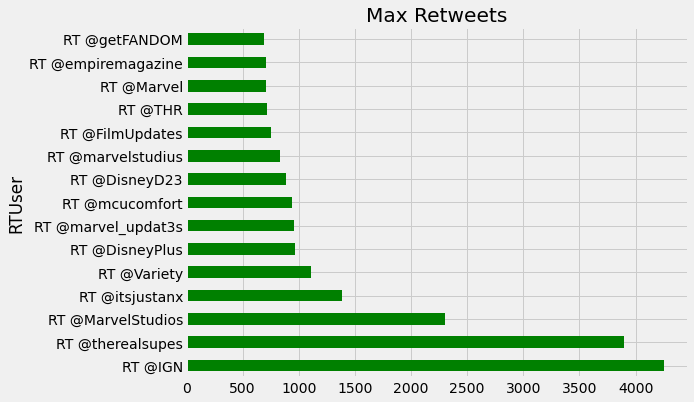

In [32]:
viz1.plot(kind = 'barh',figsize = (8,6), color = 'Green',title = 'Max Retweets')

In [33]:
device = data.groupby('statusSource').count()
s = device.sort_values(by=['Tweet_cont'],ascending=False)
viz2 = s.iloc[:7,2]
viz2

statusSource
Twitter for iPhone     20574
Twitter for Android    15948
Twitter Web App         4910
Twitter for iPad         864
TweetDeck                 96
Tweetbot for iΟS          72
Twitter for Mac           20
Name: Retweet Count, dtype: int64

<AxesSubplot:title={'center':'Popular Devices'}, xlabel='statusSource'>

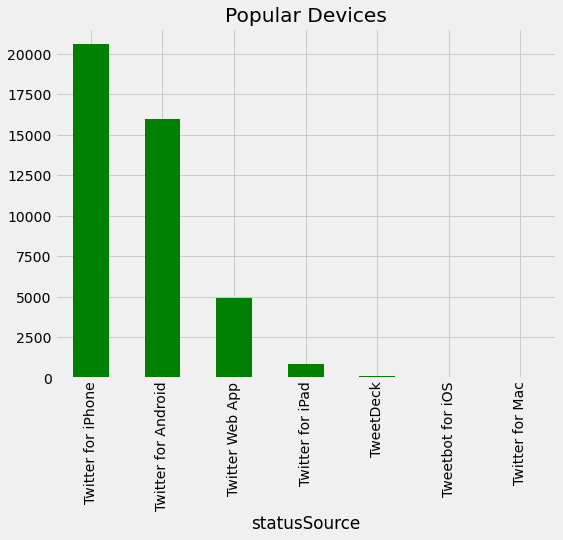

In [34]:
viz2.plot(kind = 'bar',figsize = (8,6), color = 'Green',title = 'Popular Devices')

<AxesSubplot:title={'center':'Active users during stream'}, xlabel='User'>

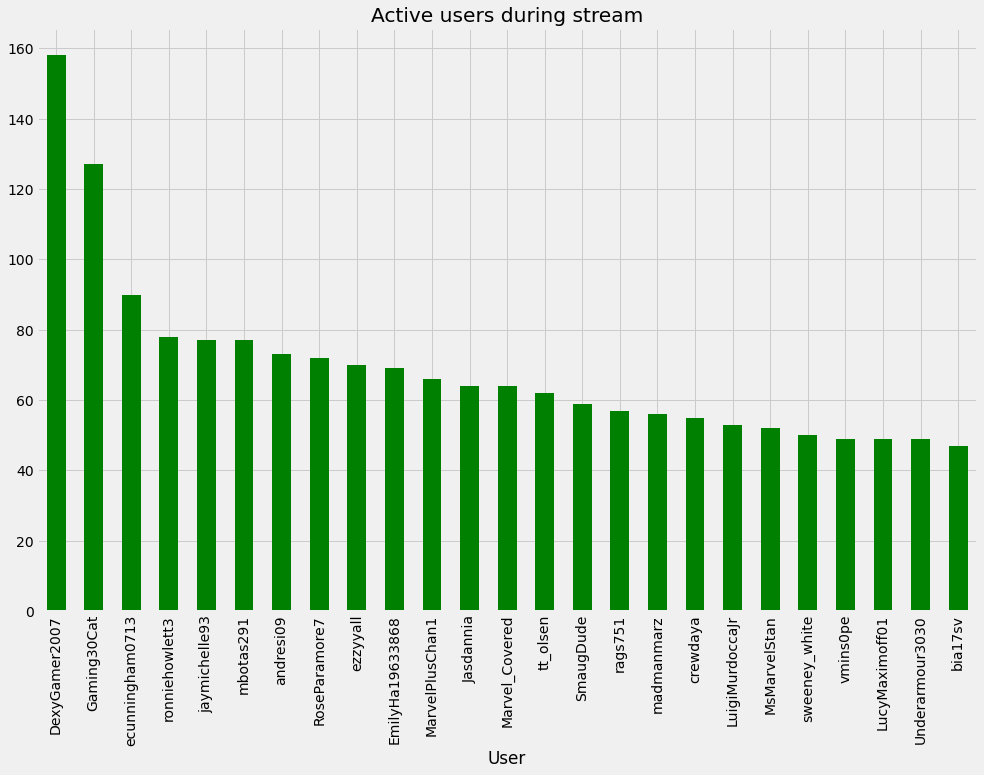

In [35]:
device = data.groupby('User').count()
s = device.sort_values(by=['Tweet_cont'],ascending=False)
viz3 = s.iloc[:25,2]
viz3.plot(kind = 'bar',figsize = (15,10), color = 'Green',title = 'Active users during stream')

In [36]:
#Removing stopwords
stopwords = nlp.Defaults.stop_words

data['Tweet_cont'] = data['Tweet_cont'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

valx=[] 
for i in range(42636):
    y = data.iloc[i,4].split()
    valx.append(y)
valx

[['live',
  'footage',
  'wanda',
  'stans',
  'storming',
  'marvel',
  'hq',
  'scarlet',
  'witch',
  'movie',
  'wasnt',
  'announced',
  'http'],
 ['disneys',
  'snow',
  'white',
  'starring',
  'rachel',
  'zegler',
  'gal',
  'gadot',
  'releasing',
  '2024',
  'https'],
 ['announced',
  'matt',
  'shakman',
  'direct',
  'marvel',
  'studios',
  'fantastic',
  'theaters',
  'november',
  '8',
  '2024',
  'https'],
 ['announced',
  'matt',
  'shakman',
  'direct',
  'marvel',
  'studios',
  'fantastic',
  'theaters',
  'november',
  '8',
  '2024',
  'https'],
 ['stars',
  'charlie',
  'cox',
  'amp',
  'vincent',
  'donofrio',
  'reunited',
  'stage',
  'new',
  'footage',
  'description'],
 ['monica', 'rambeau', 'trained', 'nick', 'fury'],
 ['chadwick', 'boseman', 'officially', 'honored', 'disney', 'legend', 'https'],
 ['david', 'harbour', 'calls', 'unique', 'mcu', 'movie', 'https'],
 ['marvel', 'studios', 'thunderbolts', 'https'],
 ['announced', 'don', 'cheadle', 'return', 'a

In [37]:
#adding all words to single list in order to make word cloud 
cleaned_words = []
for sublist in valx:
    for item in sublist:
        cleaned_words.append(item)

cleaned_words

['live',
 'footage',
 'wanda',
 'stans',
 'storming',
 'marvel',
 'hq',
 'scarlet',
 'witch',
 'movie',
 'wasnt',
 'announced',
 'http',
 'disneys',
 'snow',
 'white',
 'starring',
 'rachel',
 'zegler',
 'gal',
 'gadot',
 'releasing',
 '2024',
 'https',
 'announced',
 'matt',
 'shakman',
 'direct',
 'marvel',
 'studios',
 'fantastic',
 'theaters',
 'november',
 '8',
 '2024',
 'https',
 'announced',
 'matt',
 'shakman',
 'direct',
 'marvel',
 'studios',
 'fantastic',
 'theaters',
 'november',
 '8',
 '2024',
 'https',
 'stars',
 'charlie',
 'cox',
 'amp',
 'vincent',
 'donofrio',
 'reunited',
 'stage',
 'new',
 'footage',
 'description',
 'monica',
 'rambeau',
 'trained',
 'nick',
 'fury',
 'chadwick',
 'boseman',
 'officially',
 'honored',
 'disney',
 'legend',
 'https',
 'david',
 'harbour',
 'calls',
 'unique',
 'mcu',
 'movie',
 'https',
 'marvel',
 'studios',
 'thunderbolts',
 'https',
 'announced',
 'don',
 'cheadle',
 'return',
 'armor',
 'wars',
 'coming',
 'https',
 'watch',
 's

In [38]:
newcw=[]
for i in cleaned_words:
    if i=='https':
        newcw.append('')
    else:
        newcw.append(i)
newcw    

['live',
 'footage',
 'wanda',
 'stans',
 'storming',
 'marvel',
 'hq',
 'scarlet',
 'witch',
 'movie',
 'wasnt',
 'announced',
 'http',
 'disneys',
 'snow',
 'white',
 'starring',
 'rachel',
 'zegler',
 'gal',
 'gadot',
 'releasing',
 '2024',
 '',
 'announced',
 'matt',
 'shakman',
 'direct',
 'marvel',
 'studios',
 'fantastic',
 'theaters',
 'november',
 '8',
 '2024',
 '',
 'announced',
 'matt',
 'shakman',
 'direct',
 'marvel',
 'studios',
 'fantastic',
 'theaters',
 'november',
 '8',
 '2024',
 '',
 'stars',
 'charlie',
 'cox',
 'amp',
 'vincent',
 'donofrio',
 'reunited',
 'stage',
 'new',
 'footage',
 'description',
 'monica',
 'rambeau',
 'trained',
 'nick',
 'fury',
 'chadwick',
 'boseman',
 'officially',
 'honored',
 'disney',
 'legend',
 '',
 'david',
 'harbour',
 'calls',
 'unique',
 'mcu',
 'movie',
 '',
 'marvel',
 'studios',
 'thunderbolts',
 '',
 'announced',
 'don',
 'cheadle',
 'return',
 'armor',
 'wars',
 'coming',
 '',
 'watch',
 'showstopping',
 '5minute',
 'perform

In [39]:
word_cloud= WordCloud(collocations = False, background_color = 'white').generate(" ".join(newcw))

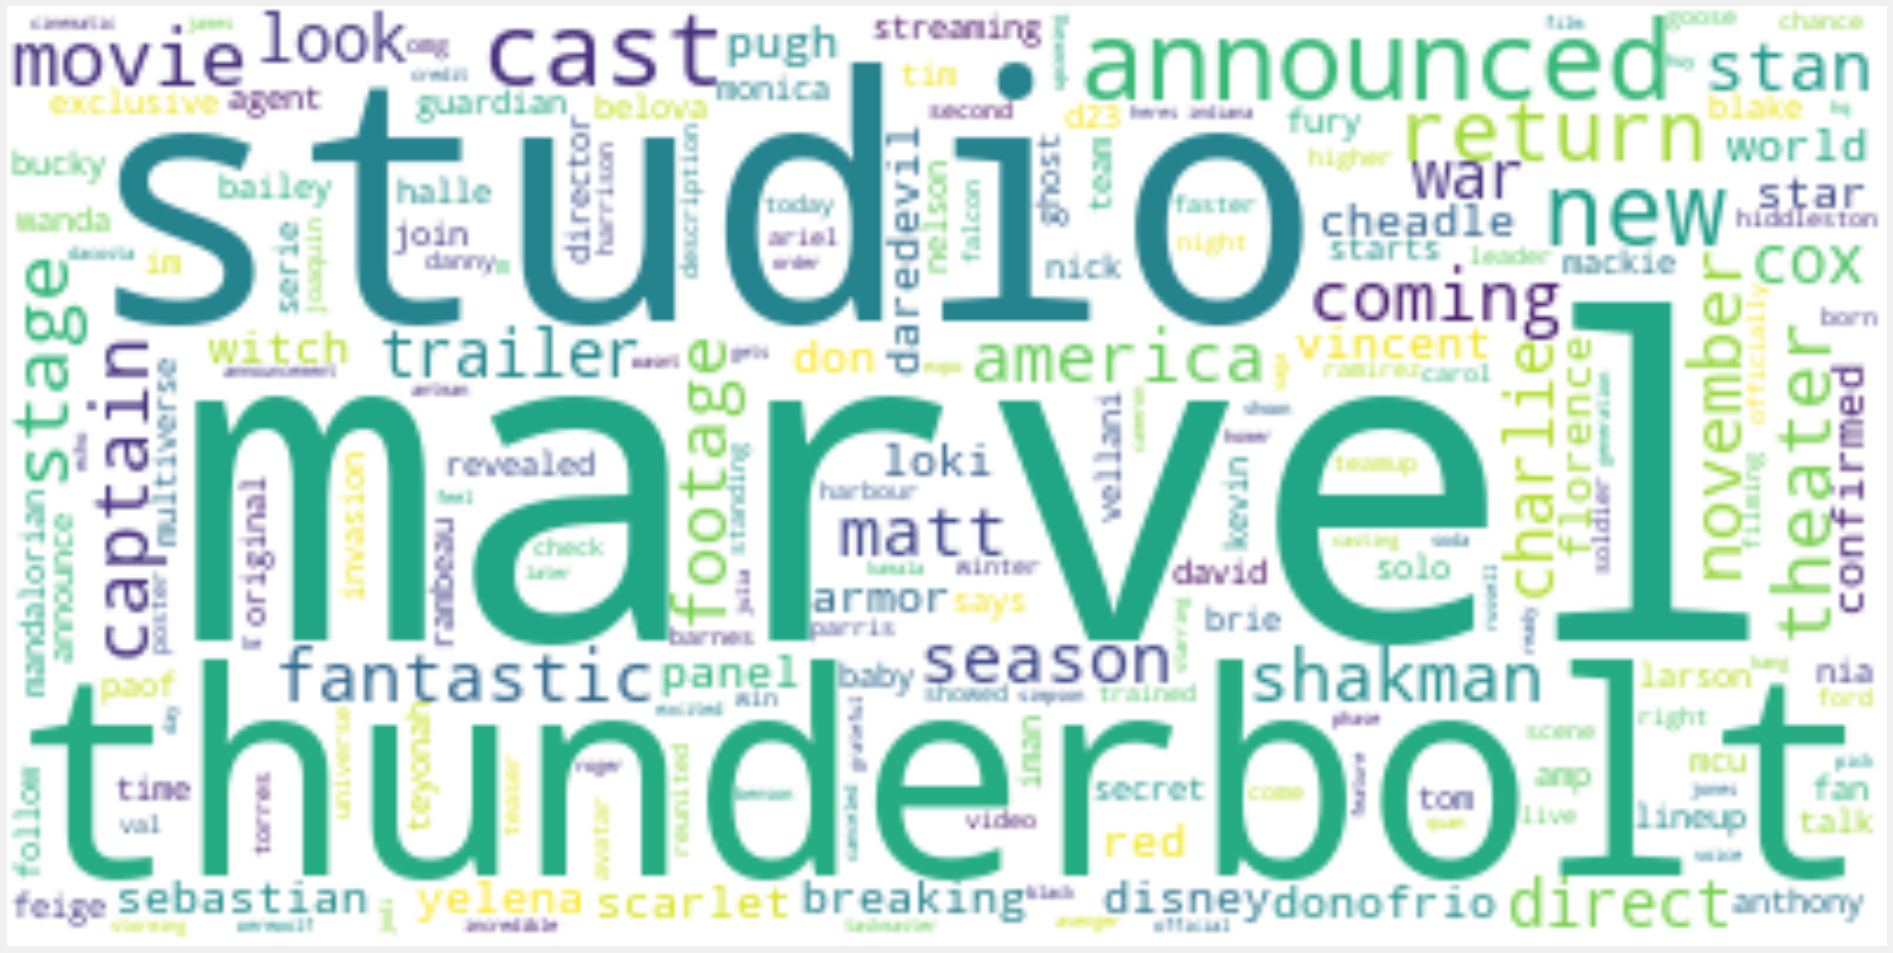

In [40]:
plt.figure(figsize=(30,30))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis 

In [41]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [42]:
tweet_data= data.loc[:,'Tweet_cont']

In [43]:
for tweet in tweet_data:
    tweet=str(tweet)
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1

positive = percentage(positive, len(tweet_list))
negative = percentage(negative, len(tweet_list))
neutral = percentage(neutral, len(tweet_list))
polarity = percentage(polarity, len(tweet_list))

positive = round(positive,2)
negative = round(negative,2)
neutral = round(neutral,2)

In [44]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  42636
positive number:  17597
negative number:  5426
neutral number:  19613


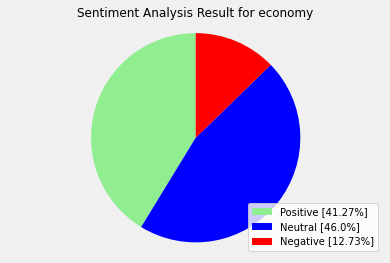

In [45]:
labels = ["Positive ["+str(positive)+"%]" , "Neutral ["+str(neutral)+"%]","Negative ["+str(negative)+"%]"]
sizes = [positive, neutral, negative]
colors = ["lightgreen", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result for economy")
plt.axis("equal")
plt.show()

In [46]:
viz4= nltk.FreqDist(neutral_list)
viz4

FreqDist({0: 1})

# <span style ='color:Blue'> Aspect Based Analysis </span>

In [47]:
aspects = []
nlp = en_core_web_sm.load()
for tweet in tweet_data:
    doc = nlp(str(tweet))
    descriptive_term = ''
    target = ''
    prepend=""
    for token in doc:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        if token.pos_ == 'ADJ':
            prepend = ''
        for child in token.children:
            if child.pos_ != 'ADV':
                continue
            prepend += child.text + ' '
        descriptive_term = prepend + token.text
    aspects.append({'aspect': target,'description': descriptive_term,})
aspects

[{'aspect': '', 'description': 'http'},
 {'aspect': '', 'description': 'https'},
 {'aspect': '', 'description': 'https'},
 {'aspect': '', 'description': 'https'},
 {'aspect': '', 'description': 'description'},
 {'aspect': '', 'description': 'fury'},
 {'aspect': '', 'description': 'officially https'},
 {'aspect': '', 'description': 'https'},
 {'aspect': 'studios', 'description': 'https'},
 {'aspect': 'wars', 'description': 'https'},
 {'aspect': 'performance', 'description': 'https'},
 {'aspect': '', 'description': 'announced'},
 {'aspect': 'panel', 'description': 'https'},
 {'aspect': 'entertainment', 'description': 'https'},
 {'aspect': '', 'description': 'showed'},
 {'aspect': '', 'description': 'https'},
 {'aspect': 'chance', 'description': 'soda'},
 {'aspect': '', 'description': 'announced'},
 {'aspect': 'man', 'description': 'touch'},
 {'aspect': 'people', 'description': 'asked'},
 {'aspect': '', 'description': 'https'},
 {'aspect': 'wallerbridge', 'description': 'stage'},
 {'aspec

In [48]:
aspects[5, 0]

TypeError: list indices must be integers or slices, not tuple

# Topic Modelling

# <span style ='color:Blue'> LDA Topic Modeling </span>

In [48]:
#gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

id2word = corpora.Dictionary(valx)

# Create Corpus
texts = valx

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]]


In [49]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('announced', 1),
  ('footage', 1),
  ('hq', 1),
  ('http', 1),
  ('live', 1),
  ('marvel', 1),
  ('movie', 1),
  ('scarlet', 1),
  ('stans', 1),
  ('storming', 1),
  ('wanda', 1),
  ('wasnt', 1),
  ('witch', 1)]]

In [50]:
#The model with list of topics sorted in descending order of the most likely topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [51]:
from pprint import pprint
pprint(lda_model.print_topics(20,15))

[(0,
  '0.357*"trailer" + 0.103*"series" + 0.096*"star" + 0.066*"original" + '
  '0.051*"wars" + 0.051*"watch" + 0.044*"people" + 0.035*"announcements" + '
  '0.017*"shorts" + 0.015*"october" + 0.014*"experience" + 0.010*"26" + '
  '0.009*"brandnew" + 0.009*"stories" + 0.009*"fate"'),
 (1,
  '0.440*"2023" + 0.172*"htt" + 0.154*"disney" + 0.031*"poster" + '
  '0.021*"pixars" + 0.020*"check" + 0.008*"exclusive" + 0.007*"movie" + '
  '0.006*"16" + 0.006*"elemental" + 0.006*"june" + 0.006*"theaters" + '
  '0.000*"filming" + 0.000*"begins" + 0.000*"iman"'),
 (2,
  '0.146*"time" + 0.096*"officially" + 0.084*"4" + 0.067*"d23" + '
  '0.042*"disney" + 0.042*"official" + 0.039*"legend" + 0.035*"boseman" + '
  '0.035*"chadwick" + 0.035*"honored" + 0.028*"2024" + 0.028*"crowd" + '
  '0.025*"presentation" + 0.021*"making" + 0.019*"starring"'),
 (3,
  '0.229*"kevin" + 0.155*"feige" + 0.099*"fantastic" + 0.088*"today" + '
  '0.085*"antman" + 0.084*"casting" + 0.065*"getting" + 0.039*"wasp" + '
  '0.0

In [52]:
doc_lda = lda_model[corpus]

In [53]:
doc_lda

In [54]:
from gensim.models import CoherenceModel

In [55]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -13.721026068367733

Coherence Score:  0.3539545666954626


In [56]:
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=False)

In [57]:
pprint(lda_model2.print_topics())

[(0,
  '0.357*"trailer" + 0.103*"series" + 0.096*"star" + 0.066*"original" + '
  '0.051*"wars" + 0.051*"watch" + 0.044*"people" + 0.035*"announcements" + '
  '0.017*"shorts" + 0.015*"october"'),
 (1,
  '0.440*"2023" + 0.172*"htt" + 0.154*"disney" + 0.031*"poster" + '
  '0.021*"pixars" + 0.020*"check" + 0.008*"exclusive" + 0.007*"movie" + '
  '0.006*"16" + 0.006*"elemental"'),
 (2,
  '0.146*"time" + 0.096*"officially" + 0.084*"4" + 0.067*"d23" + '
  '0.042*"disney" + 0.042*"official" + 0.039*"legend" + 0.035*"chadwick" + '
  '0.035*"boseman" + 0.035*"honored"'),
 (3,
  '0.229*"kevin" + 0.155*"feige" + 0.099*"fantastic" + 0.088*"today" + '
  '0.085*"antman" + 0.084*"casting" + 0.065*"getting" + 0.039*"wasp" + '
  '0.036*"confirms" + 0.032*"arent"'),
 (4,
  '0.151*"announced" + 0.125*"theaters" + 0.123*"2024" + 0.096*"fantastic" + '
  '0.093*"matt" + 0.093*"shakman" + 0.092*"november" + 0.092*"8" + '
  '0.090*"direct" + 0.011*"cant"'),
 (5,
  '0.467*"footage" + 0.081*"exclusive" + 0.050*"

In [58]:
# Plotting tools
import pyLDAvis

import pyLDAvis.gensim_models 
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# Visualizing  the topics with pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=id2word, mds='mmds')
vis

C:\Users\krtej\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14     0.257143  0.402250       1        1  19.080807
18     0.185815 -0.474503       2        1  10.809973
12     0.132310 -0.313155       3        1   7.923859
9     -0.167710  0.506907       4        1   7.725164
4      0.345304 -0.299956       5        1   7.090760
8      0.474050 -0.142807       6        1   6.355997
2      0.083910  0.455852       7        1   5.108456
13    -0.337917 -0.389650       8        1   5.005515
15    -0.441003  0.150246       9        1   3.694990
19     0.406722  0.269864      10        1   3.547830
5      0.415043  0.074332      11        1   3.545832
16    -0.066915  0.286909      12        1   3.317598
11    -0.451840 -0.011360      13        1   3.052168
0     -0.317128  0.298987      14        1   3.029039
17    -0.081108 -0.468074      15        1   2.934540
1     -0.168622  0.074973      16        1   2.172964
3     -0.154897 -0.262163      17        1   2.006349
6     -0.366417 -0.167535      18        1   1.875487
10     0.015603  0.008735      19        1   1.062890
7      0.237658  0.000148      20        1   0.659782, topic_info=             Term          Freq         Total Category  logprob  loglift
17          https  42698.000000  42698.000000  Default  30.0000  30.0000
5          marvel  13349.000000  13349.000000  Default  29.0000  29.0000
58   thunderbolts  14084.000000  14084.000000  Default  28.0000  28.0000
131          cast   7100.000000   7100.000000  Default  27.0000  27.0000
164       marvels   6752.000000   6752.000000  Default  26.0000  26.0000
..            ...           ...           ...      ...      ...      ...
438          iman      0.057441      2.291215  Topic20 -10.4163   1.3349
421        lumbly      0.057427      2.288654  Topic20 -10.4166   1.3358
417          carl      0.057427      2.288654  Topic20 -10.4166   1.3358
416       bradley      0.057427      2.288689  Topic20 -10.4166   1.3358
631          film      0.057427      2.289056  Topic20 -10.4166   1.3356

[711 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
307       6  0.907404      1
188      16  0.961652     16
130       6  0.998381      2
145      12  0.109709   2023
145      16  0.889508   2023
...     ...       ...    ...
12       13  0.998082  witch
282      14  0.961322   wont
152      12  0.998743  world
245       2  0.985006   wrap
335       7  0.985822   xmen

[282 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 19, 13, 10, 5, 9, 3, 14, 16, 20, 6, 17, 12, 1, 18, 2, 4, 7, 11, 8])

# <span style ='color:Blue'> LSA Topic Modelling</span>

In [60]:
#Training LSA moel for various number of ckusters
for i in range(2,10):
    lsi = LsiModel(corpus, num_topics=i, id2word=id2word)
    coherence_model = CoherenceModel(model=lsi, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('no. of clusters: {} and Coherence score  {}'.format(i, coherence_score))

no. of clusters: 2 and Coherence score  0.37440750950102836
no. of clusters: 3 and Coherence score  0.2885037408464821
no. of clusters: 4 and Coherence score  0.3325972642519901
no. of clusters: 5 and Coherence score  0.33517476856509687
no. of clusters: 6 and Coherence score  0.31729272452984764
no. of clusters: 7 and Coherence score  0.2937838697628447
no. of clusters: 8 and Coherence score  0.30486057761577245
no. of clusters: 9 and Coherence score  0.315074446021632


In [61]:
lsi = LsiModel(corpus, num_topics=, id2word=id2word)

In [62]:
#finding 6 most common words
for topic_num, words in lsi.print_topics(num_words=6):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.708*"https" + 0.354*"marvel" + 0.312*"studios" + 0.216*"announced" + 0.168*"thunderbolts" + 0.139*"theaters".
Words in 1: -0.534*"https" + 0.319*"marvel" + 0.284*"studios" + 0.271*"announced" + 0.191*"shakman" + 0.191*"matt".


In [63]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


data['Subjectivity']=data['Tweet_cont'].apply(getSubjectivity)
data['Polarity']=data['Tweet_cont'].apply(getPolarity)


data

,User,Time,Retweet Count,statusSource,Tweet_cont,RTUser,Subjectivity,Polarity
0,juan_seabear,2022-09-10 21:15:14+00:00,422.0,Twitter for iPad,live footage wanda stans storming marvel hq sc...,itsjustanx,0.500000,0.136364
1,proutkipu20605,2022-09-10 21:15:14+00:00,5773.0,Twitter for iPhone,disneys snow white starring rachel zegler gal ...,DisneyStudios,0.000000,0.000000
2,ddl_holyfuck,2022-09-10 21:15:13+00:00,6684.0,Twitter for Android,announced matt shakman direct marvel studios f...,MarvelStudios,0.650000,0.250000
3,RyanGlover14109,2022-09-10 21:15:13+00:00,937.0,Twitter for Android,announced matt shakman direct marvel studios f...,Marvel,0.650000,0.250000
4,lllMANDOlll,2022-09-10 21:15:13+00:00,439.0,Twitter for Android,stars charlie cox amp vincent donofrio reunite...,MCU_Direct,0.454545,0.136364
...,...,...,...,...,...,...,...,...
46124,TreyvonButler8,2022-09-10 19:36:18+00:00,99.0,Twitter for Android,monica rambeau trained nick fury,RT @therealsupes,0.000000,0.000000
46126,JackAFCEdwards,2022-09-10 19:36:18+00:00,156.0,Twitter for Android,thunderbolts marvel teamup movie avengers,RT @bestofpugh,0.000000,0.000000
46127,pwpyy,2022-09-10 19:36:18+00:00,143.0,Twitter for iPhone,sebastian stan paof cast thunderbolts marvel p...,RT @MidiasStan,0.000000,0.000000
46128,Bazzi85669840,2022-09-10 19:36:18+00:00,156.0,Twitter for iPhone,look marvels secret invasion https,RT @NewRockstars,0.700000,-0.400000


In [64]:
def getanalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Postive'
    
data['Analysis']=data['Polarity'].apply(getanalysis)

data

,User,Time,Retweet Count,statusSource,Tweet_cont,RTUser,Subjectivity,Polarity,Analysis
0,juan_seabear,2022-09-10 21:15:14+00:00,422.0,Twitter for iPad,live footage wanda stans storming marvel hq sc...,itsjustanx,0.500000,0.136364,Postive
1,proutkipu20605,2022-09-10 21:15:14+00:00,5773.0,Twitter for iPhone,disneys snow white starring rachel zegler gal ...,DisneyStudios,0.000000,0.000000,Neutral
2,ddl_holyfuck,2022-09-10 21:15:13+00:00,6684.0,Twitter for Android,announced matt shakman direct marvel studios f...,MarvelStudios,0.650000,0.250000,Postive
3,RyanGlover14109,2022-09-10 21:15:13+00:00,937.0,Twitter for Android,announced matt shakman direct marvel studios f...,Marvel,0.650000,0.250000,Postive
4,lllMANDOlll,2022-09-10 21:15:13+00:00,439.0,Twitter for Android,stars charlie cox amp vincent donofrio reunite...,MCU_Direct,0.454545,0.136364,Postive
...,...,...,...,...,...,...,...,...,...
46124,TreyvonButler8,2022-09-10 19:36:18+00:00,99.0,Twitter for Android,monica rambeau trained nick fury,RT @therealsupes,0.000000,0.000000,Neutral
46126,JackAFCEdwards,2022-09-10 19:36:18+00:00,156.0,Twitter for Android,thunderbolts marvel teamup movie avengers,RT @bestofpugh,0.000000,0.000000,Neutral
46127,pwpyy,2022-09-10 19:36:18+00:00,143.0,Twitter for iPhone,sebastian stan paof cast thunderbolts marvel p...,RT @MidiasStan,0.000000,0.000000,Neutral
46128,Bazzi85669840,2022-09-10 19:36:18+00:00,156.0,Twitter for iPhone,look marvels secret invasion https,RT @NewRockstars,0.700000,-0.400000,Negative


# <span style ='color:Blue'> BERT Model</span>

In [65]:
#Seprate File 